12.3 차원의 저주

k-NN은 '차원의 저주 (curse of dimensionality)'라는 것 때문에 고차원에서 문제가 생김.

이것은 데이터가 고차원이라는 것은 다루는 공간이 엄청나게 크다는 것을 의미하며, 그 떄문에 데이터 포인트들은 서로 '근접'하지 않게 된다. 이 현상을 관찰하기 위해서는 d-차원 단위 범위 내에 다양한 차원으로 임의의 점 두개를 생성해 보면 된다.

In [33]:
import math

In [25]:
def distance(a, b):
    return math.sqrt(sum((ai-bi)**2 for ai,bi in zip(a,b)))

In [26]:
def mean(xs):
    return sum(xs)/len(xs)

In [22]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

In [23]:
def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

1차부터 100차원까지의 각각의 차원에 대해 총 10000개의 거리를 계산 뒤,

각 점들 간의 평균 거리와 최소 거리를 구해 보자.

In [35]:
dimensions = range(1,101)

avg_distances = []
min_distances = []
random.seed(0)

for dim in dimensions:
    distances = random_distances(dim, 10000) # 10000개 임의 생성
    avg_distances.append(mean(distances)) # 평균 거리
    min_distances.append(min(distances))

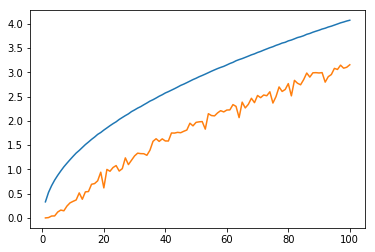

In [37]:
plt.plot(dimensions, avg_distances)
plt.plot(dimensions, min_distances)
plt.show()

차원이 증가할수록 점들 간 평균거리도 증가하지만, 더 큰 문제는 최근접거리와 평균 거리의 비율

In [38]:
min_avg_ratio = [min_dist / avg_dist
                 for min_dist, avg_dist in zip(min_distances, avg_distances)]

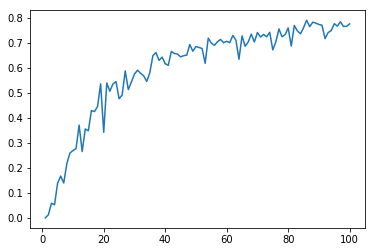

In [40]:
plt.plot(dimensions, min_avg_ratio)
plt.show()

저 차원에서는 근접이웃들이 평균 거리에 비해 월등히 가까움.

하지만 두 점이 '가깝다'고 하려면 모든 차원에 대해 가까워야 하기 때문에, 차원이 추가된다는 것은 (단지 노이즈라 해도) 두 점이 가까울 수 있는 가능성이 현저히 줄어든다는 것을 의미하기도 한다.

즉, 고차원일 때는 근접이웃들이 평군 거리와 큰 차이가 나지 않게 되고, 그렇기 때문에 가깝다는 것이 별 의미를 가지지 않게 된다(데이터에 뚜렷한 구조가 있어서 고차원임에도 저차원의 특성을 가지지 않는 한).

고차원 문제를 바라볼 수 있는 또 다른 관점은 공간의 성김(sparsity)이다.

0과 1사이에서 50개의 점을 임의로 고르면, 단위 구간을 제법 채울 수 있다.

2차원상에서 똑같이 50개를 고르면, 단위 공간을 덜 채우게 되고, 3차원에서는 그보다 더 적은 공간을 채우게 된다.

matplolib로는 4차원을 그릴 수 없기 떄문에 이쯤에서 그치겠다. 여기까지만 해봐도 차원이 높아질수록 점들 사이의 거리가 멀어지고 빈 공간이 많아진다는 것을 충분히 느낄 수 있었을 것이다.

데이터가 기하급수적으로 많지 않으면, 고차원에서는 모든 점 사이의 거리가 멀어진다.

따라서 고차원에서 k-NN을 이용하려면, 먼저 차원 축소를 하는 것이 좋을 것이다.

Reference:
    * 밑바닥부터 시작하는 데이터과학 10장,
    * https://github.com/newhiwoong/DATA_SCIENCE_FROM_SCRATCH
    * https://github.com/joelgrus/data-science-from-scratch
    * https://github.com/cbare/data-science-from-scratch
    